# HW 9 - ASSN 1: Time Series Analysis of MTA Subway Rides

In [1]:
from __future__ import print_function
import numpy as np
import pandas as pd
import pylab as pl
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Downloading the data and obtaining its shape

In [4]:
os.system(os.getenv("PUIDATA") + "/MTA_Fare.npy")

32256

In [5]:
mtarides = np.load(os.getenv("PUIDATA") + "/MTA_Fare.npy")
mtarides.shape

(600, 23, 194)

# Replacing "-1" values with NaN

In [6]:
mtarides = mtarides.astype('float')
mtarides[mtarides == -1] = 'NaN'
mtarides

array([[[  5.69610000e+04,   6.47030000e+04,   6.80020000e+04, ...,
           3.65270000e+04,   3.39290000e+04,   3.68240000e+04],
        [  1.73200000e+03,   2.08300000e+03,   2.10700000e+03, ...,
           1.26400000e+03,   1.17200000e+03,   1.23800000e+03],
        [  2.03000000e+02,   2.76000000e+02,   2.45000000e+02, ...,
           1.86000000e+02,   1.67000000e+02,   1.67000000e+02],
        ..., 
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
           0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
        [             nan,              nan,              nan, ...,
           1.12100000e+03,   1.37700000e+03,   7.12000000e+02]],

       [[  1.62100000e+04,   2.01790000e+04,   2.17690000e+04, ...,
                      nan,              nan,              nan],
        [  5.03000000e+02,   6.47000000e+02,   6.65000000e+0

# <i>Task 1: Event Detection via 3-Sigma Threshold</i>

In [7]:
wkinterval = pd.date_range('05/21/2010', periods = 194, freq = 'W')

In [9]:
mta_allstationsum = np.nansum(mtarides, axis = 1)
mta_allstationmean = np.nanmean(mtarides, axis = 1)
mta_allstationsd = np.nanstd(mtarides, axis = 1)

mta_allridesum = np.nansum(mtarides, axis = 0)
mta_allridemean = np.nanmean(mtarides, axis = 0)
mta_allridesd = np.nanstd(mtarides, axis = 0)

ridesbyweek = np.nansum(mta_allstationsum, axis = 0)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1136: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:675: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)
/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/nanfunctions.py:1136: RuntimeWarning: Degrees of freedom <= 0 for slice.
  warnings.warn("Degrees of freedom <= 0 for slice.", RuntimeWarning)


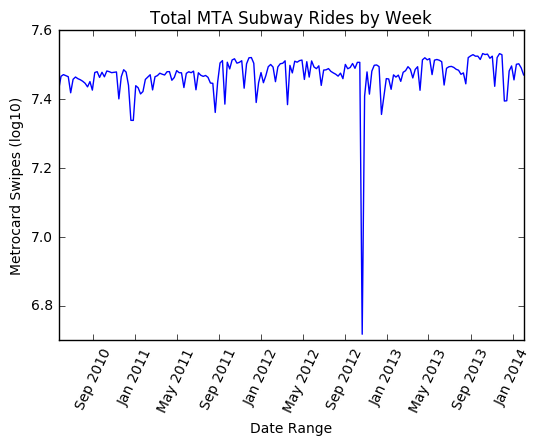

In [11]:
pl.plot(wkinterval, np.log10(ridesbyweek))
pl.title('Total MTA Subway Rides by Week')
pl.xticks(rotation = '65')
pl.xlabel('Date Range')
pl.ylabel('Metrocard Swipes (log10)')

# Figure 1. Total MTA Subway Rides by Week
This figure shows the MTA subway ridership (measured by swipes) over the time period from 5/21/2010 to 02/21/2014.  There is some seasonal variation by ridership, with one very pronounced dip in the October 2012 range.  

In [14]:
print ("Mean of swipes by week {:.2f}".format(np.nanmean(ridesbyweek)))
print ("Standard deviation of swipes by week {:.2f}".format(np.nanstd(ridesbyweek)))
thresholds = [np.nanmean(ridesbyweek) + 3 * np.nanstd(ridesbyweek),
             np.nanmean(ridesbyweek) - 3 * np.nanstd(ridesbyweek)]
print ("3-Sigma thresholds {:.2f} {:.2f}".format(*thresholds))
print ("Earliest datapoint", min(wkinterval))

Mean of swipes by week 29781349.87
Standard deviation of swipes by week 2983960.42
3-Sigma thresholds 38733231.14 20829468.61
Earliest datapoint 2010-05-23 00:00:00


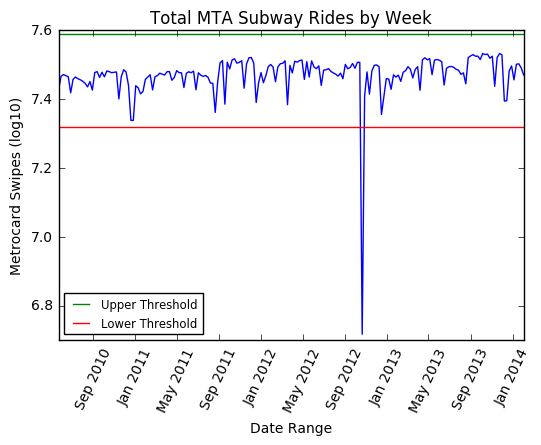

In [17]:
pl.plot(wkinterval, np.log10(ridesbyweek))
pl.plot((min(wkinterval), max(wkinterval)), 
        (np.log10(thresholds[0]), np.log10(thresholds[0])), label = 'Upper Threshold')
pl.plot((min(wkinterval), max(wkinterval)), 
        (np.log10(thresholds[1]), np.log10(thresholds[1])), label = 'Lower Threshold')
pl.title('Total MTA Subway Rides by Week')
pl.xticks(rotation = '65')
pl.xlabel('Date Range')
pl.ylabel('Metrocard Swipes (log10)')
pl.legend(loc = 'best', fontsize = 'small')

# Figure 2. Total MTA Subway Rides by Week (with 3-Sigma Thresholds)
This figure shows the MTA subway ridership (measured by swipes) over the time period from 5/21/2010 to 02/21/2014, with the three-sigma thresholds included. There is some seasonal variation by ridership, with one very pronounced peak in the October 2012 range.  The pronounced dip falls OUTSIDE of the three-sigma threshold.  This phenomena can be attributed to Superstorm Sandy, which is when the MTA actually shut down the subway system.

In [18]:
print (wkinterval[np.where(ridesbyweek < thresholds[1])])

DatetimeIndex(['2012-10-21'], dtype='datetime64[ns]', freq=None)


# <i>Task 2: Identify the Time Series with the Most Downward Trend</u>

In [19]:
sum_allrides = mta_allridesum.transpose()
sum_allrides.shape

(194, 23)

In [21]:
ridetype = np.array(['10t', '14d', '1d', '2t', '30d', '7d', 'ada', 'afas', 'exp', 'ez',
                    'ff', 'mc', 'mr', 'month', 'rfm', 'rr', 'sen', 'spec', 'tcmc', 't',
                    'umlim', 'xbus', 'stud'])

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for ndarrays and will be removed in a future version
  if __name__ == '__main__':


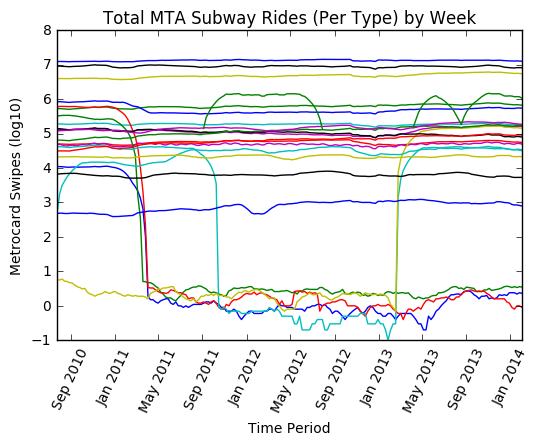

In [26]:
pl.plot(wkinterval, np.log10(pd.stats.moments.rolling_mean(sum_allrides, 10)))
pl.title('Total MTA Subway Rides (Per Type) by Week')
pl.xticks(rotation = '65')
pl.xlabel("Time Period")
pl.ylabel("Metrocard Swipes (log10)")

# Figure 3: Total MTA Subway Rides (Per Type) by Week
This figure shows the MTA subway ridership (measured by swipes) over the time period from 5/21/2010 to 02/21/2014, broken down by type. There are some notable differences between types - some have fairly consistent ridership, whereas others have seasonal variations.  These can be attributed to reasons such as student Metrocards (valid only during the school year) and fixed-period Metrocards (potentially more popular during the warmer months).

# <i>Task 3: Identify the Most Prominent Periodicities</u>

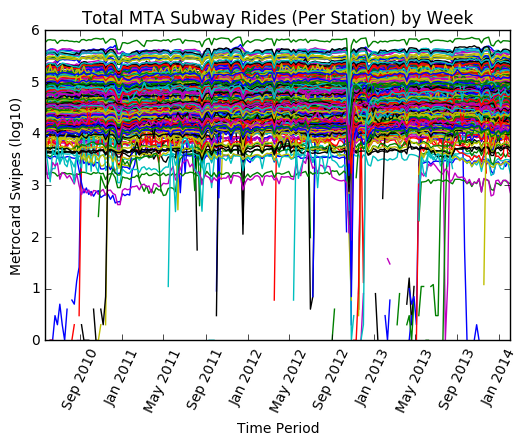

In [27]:
mtastationsum = mta_allstationsum.transpose()
pl.plot(wkinterval, np.log10(mtastationsum))
pl.title('Total MTA Subway Rides (Per Station) by Week')
pl.xticks(rotation = '65')
pl.xlabel('Time Period')
pl.ylabel('Metrocard Swipes (log10)')

#  Figure 4: Total MTA Subway Rides (Per Station) by Week
This figure shows the MTA subway ridership (measured by swipes) over the time period from 5/21/2010 to 02/21/2014, broken down by station.  There is strong correlation between stations, as many of the trends are consistent (e.g. Superstorm Sandy).  There are, however, some noticeable outliers such several stations that are exhibiting significantly less usage - possibly due to being on the outskirts of the subway system.

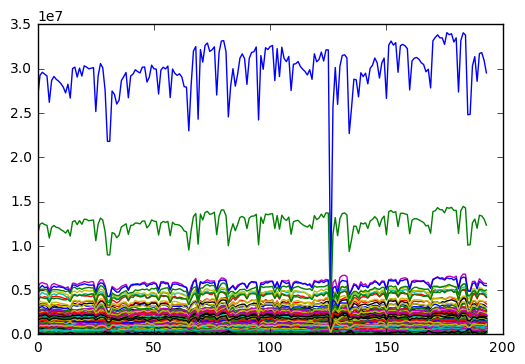

In [28]:
pl.plot(np.abs(np.fft.rfft(mtastationsum)))

In [29]:
N = 194
d = 1.0/52.0
np.fft.rfftfreq(N, d)

array([  0.        ,   0.26804124,   0.53608247,   0.80412371,
         1.07216495,   1.34020619,   1.60824742,   1.87628866,
         2.1443299 ,   2.41237113,   2.68041237,   2.94845361,
         3.21649485,   3.48453608,   3.75257732,   4.02061856,
         4.28865979,   4.55670103,   4.82474227,   5.09278351,
         5.36082474,   5.62886598,   5.89690722,   6.16494845,
         6.43298969,   6.70103093,   6.96907216,   7.2371134 ,
         7.50515464,   7.77319588,   8.04123711,   8.30927835,
         8.57731959,   8.84536082,   9.11340206,   9.3814433 ,
         9.64948454,   9.91752577,  10.18556701,  10.45360825,
        10.72164948,  10.98969072,  11.25773196,  11.5257732 ,
        11.79381443,  12.06185567,  12.32989691,  12.59793814,
        12.86597938,  13.13402062,  13.40206186,  13.67010309,
        13.93814433,  14.20618557,  14.4742268 ,  14.74226804,
        15.01030928,  15.27835052,  15.54639175,  15.81443299,
        16.08247423,  16.35051546,  16.6185567 ,  16.88